Todo

pass/get X_test


In [31]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import pickle #loading history

In [32]:
#model_to_load = "simple_try_on_unaugmented_33_classes"
#model_to_load = "first_model_on_augmented"
#model_to_load = "friday"
model_to_load = "friday_model_on_45_no_aug"
model_to_load = "sat_model_on_45_no_aug_slow_lr"
def load_our_model(model_to_load):
    #load a model
    models_folder  = os.path.join("..","..","models")

    model_path = os.path.join(models_folder, model_to_load)

    model = keras.models.load_model(model_path)
    
    return model

model = load_our_model(model_to_load)

def load_history(model_name):
    #model_name="test_folder"
    
    model_path = os.path.join("..", "..", "models", model_name) #, "test_folder")
    
    path = os.path.join(model_path, "history")
    
    with open(path, "rb") as history_file:
        history = pickle.load(history_file)

    return history

history = load_history(model_to_load)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      8224      
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      16416     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      16416     
                                                        

In [3]:
#load X test - !!! according to which data that the model was trained on
batch_size = 16 #None = 1 #16 #32
img_height = 224
img_width = 224
seed_train_validation = 69 # Must be same for train
path_to_dataset_test = os.path.join("..","..","data","food","test")
path_to_dataset_test = os.path.join("..","..","test_data","2_whole_data_some_dups","test")
path_to_dataset_test = os.path.join("..", "..", "test_data", "3_whole_bucket_no_aug","test")
X_test = image_dataset_from_directory(
        path_to_dataset_test,
        label_mode="int",
        color_mode="rgb",
        seed=seed_train_validation,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=False
        )

X_test.__dict__; #can get file paths
X_test.class_names;


Found 4369 files belonging to 45 classes.


In [18]:
X_test.file_paths[0]

'../../test_data/3_whole_bucket_no_aug/test/apple/apple_0.jpg'

## Functions

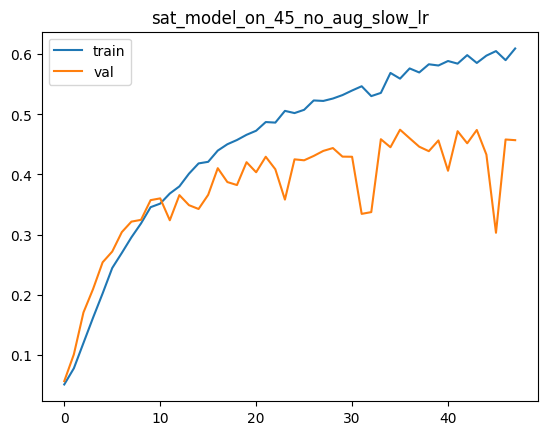

In [36]:
def plot_learning_curve(history, model_name = ""):
    history.history;
    train_accuracy = history.history["sparse_categorical_accuracy"]
    val_accuracy = history.history["val_sparse_categorical_accuracy"]

    plt.plot(train_accuracy, label="train")
    plt.plot(val_accuracy,label="val")
    plt.title(model_name)
    plt.legend()
    return None
plot_learning_curve(history, model_to_load);


In [29]:
#get y
def get_y_from_X(X, batched_out=True):
    
    y_batched = []
    y = []
    
    for batch_image, batch_label in X:
        
        if batched_out:
            y_batched.append(batch_label.numpy())
        else:
            for image,label in zip(batch_image, batch_label):
                y.append(label.numpy())
     
    if batched_out:
        print("len y_batched", len(y_batched) )
        return y_batched
    else:
        print("len y", len(y))
        return y
    
def get_y_test(X_test_in):
    y_test = get_y_from_X(X_test_in, batched_out=False)
    return y_test
    
def get_y_pred(X_test_in):
    
    y_predictions = model.predict(X_test, verbose=1)
    y_pred = []
    
    for pred in y_predictions:
        y_pred.append(pred.argmax())
        
    return y_pred

y_pred = get_y_pred(X_test)
y_test = get_y_test(X_test)
y_pred; #this keeps not-working when model is training... shut down all kernels?

NameError: name 'model_name' is not defined

In [21]:
def get_target_dict():
    #classes = os.listdir(path_to_dataset_test)
    classes = X_test.class_names
    classes.sort()
    
    #classes.remove(".ipynb_checkpoints")
    
    target_dict_out = {}
    for index, veg in enumerate(classes):
        target_dict_out[index] = veg
    
    return target_dict_out
target_dict = get_target_dict()
target_dict

{0: 'apple',
 1: 'asparagus',
 2: 'avocado',
 3: 'banana',
 4: 'beef',
 5: 'beetroot',
 6: 'blueberry',
 7: 'broccoli',
 8: 'cabbage',
 9: 'capsicum',
 10: 'carrot',
 11: 'cauliflower',
 12: 'celery',
 13: 'chicken',
 14: 'coconut',
 15: 'cod',
 16: 'corn',
 17: 'cranberry',
 18: 'cucumber',
 19: 'eggplant',
 20: 'eggs',
 21: 'garlic',
 22: 'ginger',
 23: 'grape',
 24: 'honey',
 25: 'kiwi',
 26: 'leek',
 27: 'lemon',
 28: 'lettuce',
 29: 'lime',
 30: 'milk',
 31: 'mushroom',
 32: 'onion',
 33: 'orange',
 34: 'pineapple',
 35: 'pork',
 36: 'potato',
 37: 'prawns',
 38: 'pumpkin',
 39: 'salmon',
 40: 'spinach',
 41: 'strawberry',
 42: 'tomato',
 43: 'white',
 44: 'zucchini'}

test label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
first test label: 0
first test label human: apple


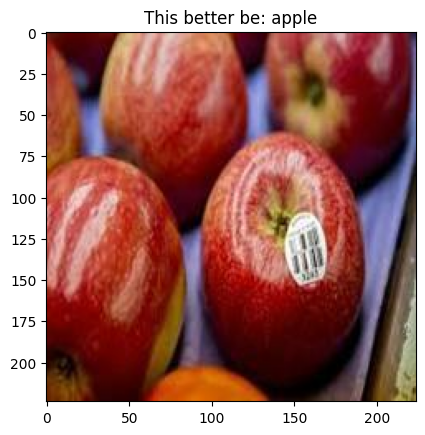

In [12]:
#show one image
count = 0
test_image, test_label = None, None

for image, label in X_test:#.take(1):
    if count == 0 :
        test_image = image.numpy()
        test_label = label.numpy()
    count+=1
    if count > 0: break
    
#if you want to see an image
print("test label:", test_label)
print("first test label:", test_label[0])
print("first test label human:", target_dict[test_label[0]])
plt.title(f"This better be: {target_dict[test_label[0]]}")
plt.imshow(test_image[0]/255)

In [13]:
#fake it til you make it work
#y_pred = [i for i in range(len(target_dict))]
#y_test = y_pred.copy()

In [14]:
from sklearn.metrics import classification_report
classes_list = X_test.class_names
print(classification_report(y_test, y_pred, target_names=classes_list))

              precision    recall  f1-score   support

       apple       0.12      0.01      0.02       181
   asparagus       0.00      0.00      0.00         9
     avocado       0.17      0.23      0.20       176
      banana       0.57      0.24      0.34       175
        beef       0.29      0.65      0.40        26
    beetroot       0.00      0.00      0.00        10
   blueberry       0.20      0.12      0.15       151
    broccoli       0.45      0.85      0.59       200
     cabbage       0.63      0.62      0.62       200
    capsicum       0.98      0.79      0.87       200
      carrot       0.98      0.91      0.94       200
 cauliflower       0.86      0.39      0.54       200
      celery       0.00      0.00      0.00         7
     chicken       0.25      0.38      0.30        26
     coconut       1.00      0.01      0.03       155
         cod       0.00      0.00      0.00         5
        corn       0.00      0.00      0.00        10
   cranberry       0.53    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


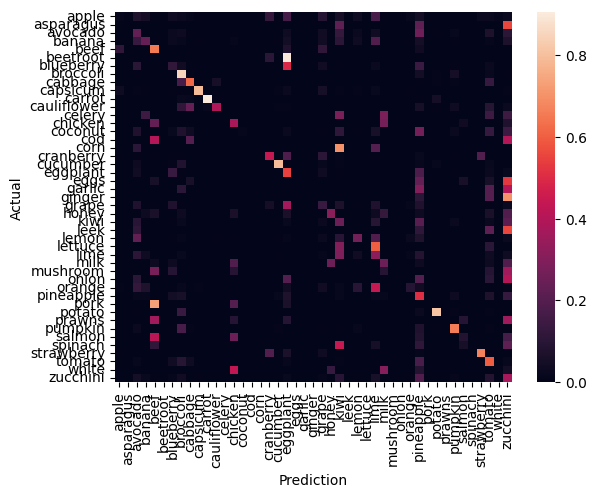

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes_code = [i for i in range(len(classes_list))]
classes_code;

cm = confusion_matrix(y_test,y_pred, labels=classes_code , normalize='true') #true as in truth
s = sns.heatmap(cm,xticklabels=classes_list, yticklabels=classes_list)
s.set(ylabel="Actual", xlabel="Prediction");

In [16]:
X_test.file_paths[0]

'../../test_data/3_whole_bucket_no_aug/test/apple/apple_0.jpg'

In [17]:
import pandas as pd
df = pd.DataFrame({"y_pred" : y_pred ,"y_test" : y_test})

#make df of index, class word, class enum (y_test) , y_pred (word), y_pred 

def get_word_from_encode(list_in):
    list_out = []
    translator_dict = get_target_dict()
    
    for code in list_in:
        list_out.append(translator_dict[code])
    
    return list_out

y_pred_word = get_word_from_encode(y_pred)
y_test_word = get_word_from_encode(y_test)

df["truth"] = y_test_word
df["prediction"] = y_pred_word
df["correct"] = df["prediction"] == df["truth"]

In [20]:
def get_test_folders_and_file_names():
    folders = []
    file_names = []
    
    for i in df.index:
        whole_path = X_test.file_paths[i]
        path = whole_path.split("/")
        
        file_name = path[-1]
        folder = os.path.join(path[2],path[3])
        
        file_names.append(file_name)
        folders.append(folder)
    return folders , file_names

folders, file_names = get_test_folders_and_file_names()
df["file_name"] = file_names 
df["folder"] = folders
#df["file_path"] = X_test.file_paths

correct_df = df[df["correct"] == True]
incorrect_df = df[df["correct"] == False]

In [21]:
incorrect_df.head()

,y_pred,y_test,truth,prediction,correct,file_name,folder
0,17,0,apple,cranberry,False,apple_0.jpg,test_data/3_whole_bucket_no_aug
1,19,0,apple,eggplant,False,apple_1.jpg,test_data/3_whole_bucket_no_aug
2,25,0,apple,kiwi,False,apple_10.jpg,test_data/3_whole_bucket_no_aug
3,27,0,apple,lemon,False,apple_100.jpg,test_data/3_whole_bucket_no_aug
4,19,0,apple,eggplant,False,apple_101.jpg,test_data/3_whole_bucket_no_aug


In [ ]:
#TODO
#plot some incorrect guesses
#look through y_true and y_pred and save indexes + correct incorrect
#get confidence of predictions?

In [22]:
model.evaluate(X_test)

274/274 [==============================] - 9s 30ms/step - loss: 2.0016 - sparse_categorical_accuracy: 0.4438 - accuracy: 0.4438


[2.001619338989258, 0.4438086450099945, 0.4438086450099945]

In [27]:
print(history["history"])

NameError: name 'history' is not defined